<a href="https://colab.research.google.com/github/LEE-1017/Gener--AI/blob/main/%E3%80%8C%E3%80%8C%E3%80%8C%E3%80%8C%E8%82%A1%E7%A5%A8%E5%88%9D%E5%A7%8B%E8%A8%AD%E5%AE%9A%E9%9B%86%E3%80%8DTCN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install twstock

import twstock
import pandas as pd
import numpy as np


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.1/626.1 kB 38.8 MB/s eta 0:00:00


In [ ]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 7.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt

In [ ]:
# NO1（final 版：技術指標都包進來，且不留 EMA12/EMA26 欄位）
def stock(ID, date_y, date_m):
    """
    回傳 df（已含 MACD / RSI14 / OBV / log_return）
    與 twstock 原始 tar_price
    """
    import numpy as np

    tar_stock = str(ID)
    stock = twstock.Stock(tar_stock)
    tar_price = stock.fetch_from(date_y, date_m)

    name_attribute = ['Date','Capacity','Turnover','Open','High','Low','Close','Change','Transaction']
    df = pd.DataFrame(columns=name_attribute, data=tar_price)

    # ========= 1. log return =========
    df['log_return'] = np.log(df['Close'] / df['Close'].shift(1))

    # ========= 2. MACD =========
    ema12 = df['Close'].ewm(span=12, adjust=False).mean()
    ema26 = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = ema12 - ema26

    # ========= 3. RSI14 =========
    delta = df['Close'].diff()
    gain  = delta.clip(lower=0)
    loss  = -delta.clip(upper=0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    df['RSI14'] = 100 - (100 / (1 + rs))

    # ========= 4. OBV =========
    price_diff = df['Close'].diff()
    sign = np.sign(price_diff).fillna(0)
    df['OBV'] = (sign * df['Capacity']).cumsum()

    # 去除前面產生 NaN 的列
    df.dropna(inplace=True)

    return df, tar_price


In [ ]:
#NO2
current_stock_id = 2317
df, tar_price = stock(ID=current_stock_id,date_y=2020,date_m=1)
tar_stock = str(current_stock_id) # Make tar_stock available globally

display(df)


,Date,Capacity,Turnover,Open,High,Low,Close,Change,Transaction,log_return,MACD,RSI14,OBV
14,2020-01-31,69686948,5823335061,83.0,84.9,82.6,83.2,0.1,28528,0.001203,-0.966376,32.075472,4.917439e+06
15,2020-02-03,66666856,5331667770,79.5,82.3,77.3,82.2,-1.0,27283,-0.012092,-1.385403,28.037383,-6.174942e+07
16,2020-02-04,49697853,4125328043,82.8,83.9,81.5,82.2,0.0,18430,0.000000,-1.697912,29.556650,-6.174942e+07
17,2020-02-05,49302064,4053426295,82.2,82.7,81.6,82.2,0.0,17553,0.000000,-1.923406,31.746032,-6.174942e+07
18,2020-02-06,44278109,3674127347,82.5,83.6,82.3,83.6,1.4,16635,0.016888,-1.966474,41.807910,-1.747131e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,2025-11-12,65085447,16260745721,248.0,252.0,245.0,251.0,4.5,48915,0.018091,7.228778,56.488550,5.652664e+09
1425,2025-11-13,90541908,22755846470,256.0,256.0,247.0,252.0,1.0,67939,0.003976,7.091822,60.317460,5.743205e+09
1426,2025-11-14,112889692,27463897255,246.5,247.0,241.0,241.0,-11.0,136154,-0.044632,6.026209,45.864662,5.630316e+09
1427,2025-11-17,84874596,20140677581,241.0,242.0,235.0,236.0,-5.0,85770,-0.020965,4.723792,39.705882,5.545441e+09


/usr/local/lib/python3.12/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


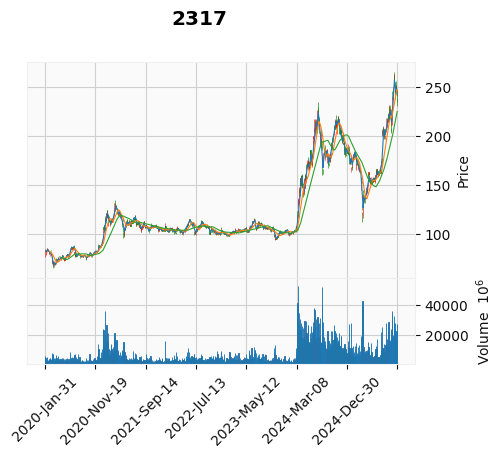

In [ ]:

#NO3
df.rename(columns={'Turnover':'Volume'},inplace=True)

mc=mpf.make_marketcolors(up='r',down='g',inherit=True)

s=mpf.make_mpf_style(base_mpf_style='yahoo',marketcolors=mc)

kwargs=dict(type='candle',mav=(5,20,60),volume=True,figratio=(10,8),figscale=0.75,title=tar_stock,style=s)

df.set_index('Date',inplace=True)

mpf.plot(df,**kwargs)

In [ ]:
#NO4
x = list(df.itertuples(index=False))


# 取出 x[0] 中所有的 keys
keys = x[0]._fields

# 顯示 keys
print(keys)


('Capacity', 'Volume', 'Open', 'High', 'Low', 'Close', 'Change', 'Transaction', 'log_return', 'MACD', 'RSI14', 'OBV')


In [ ]:
#NO5
# x = [成交量, 成交金額, 開盤金額, 最高金額, 最低金額, 收盤金額, 當天漲跌幅, 成交筆數]
# y = [隔天漲跌幅]

time_window = 20

data        = []   # 20 天 × 11 特徵
y_ret       = []   # 目標：log return
y_price     = []   # 真實的隔日收盤價（之後算 MAE / RMSE 用）
base_price  = []   # 當天收盤價（log return 的分母）

for i in range(time_window, len(x) - 1):
    feature_row = []

    # 20 天的特徵展平
    for j in range(i - time_window, i):
        feature_row.extend([
            x[j].log_return,
            x[j].Open, x[j].High, x[j].Low, x[j].Close,
            x[j].Capacity, x[j].Volume, x[j].Transaction,
            x[j].MACD, x[j].RSI14, x[j].OBV
        ])
    data.append(feature_row)

    # 底價 = 最後一天(第 i 天)的收盤價
    c_t = x[i].Close
    # 隔天價格
    c_t1 = x[i+1].Close

    # log return 當作訓練目標
    lr = np.log(c_t1 / c_t)

    base_price.append(c_t)
    y_price.append(c_t1)
    y_ret.append(lr)

# 變成 numpy
X         = np.array(data)              # (N, 20*11)
y_ret     = np.array(y_ret).reshape(-1, 1)     # (N,1)
y_price   = np.array(y_price).reshape(-1, 1)   # (N,1)
base_price = np.array(base_price).reshape(-1,1)

# Define X_seq and target, and y before printing their shapes for later use
X_seq = X.reshape(X.shape[0], time_window, 11)
target = y_ret # Assuming target is y_ret based on cell l9AqdadhC6wk
y = y_ret      # For consistency with later cells where y is used as target

# 印出第 4 天的股票資料作為測試
#x[4]
print("X_seq shape =", X_seq.shape)   # (樣本數, 20, 11)
print("y shape =", y.shape)           # (樣本數,)

X_seq shape = (1379, 20, 11)
y shape = (1379, 1)


data length: 1379
target length: 1379


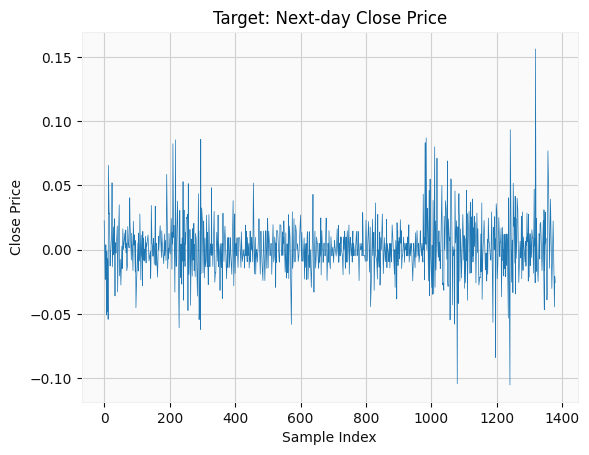

In [ ]:
#NO6
#NO6
# 顯示 data 和 target 的長度，確認總提取出的數據筆數大小是否正確
print("data length:", len(data))
print("target length:", len(target))

import matplotlib.pyplot as plt
import numpy as np

# 設置字體為 "DejaVu Sans"，以確保圖表中的字體顯示正確
plt.rcParams["font.family"] = "DejaVu Sans"

plt.plot(target, lw=0.5)
plt.title("Target: Next-day Close Price")
plt.xlabel("Sample Index")
plt.ylabel("Close Price")
plt.show()


In [ ]:
#NO7
def normalize_data(data):
    """將數據歸一化到 [0, 1] 範圍內，並四捨五入到小數點後五位。
    Args: data (array-like): 要歸一化的數據，可以是列表、NumPy 陣列等。
    Returns: array-like: 歸一化後且四捨五入到小數點後五位的數據。
    """

    min_vals = np.min(data, axis=0)
    max_vals = np.max(data, axis=0)
    norm_data = (data - min_vals) / (max_vals - min_vals + 1e-8)
    return norm_data, min_vals, max_vals

norm_data, min_vals, max_vals = normalize_data(X)
# 將 data 進行歸一化處理，並將結果存入 norm_data
#norm_data = normalize_data(data)

y = np.array(target)

In [ ]:
#NO8
# NO8（調整後）
print("X original shape:", X.shape)
print("X normalized shape:", norm_data.shape)
print("y shape:", y.shape)



X original shape: (1379, 220)
X normalized shape: (1379, 220)
y shape: (1379, 1)




---



In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 原始 flat 特徵 & 目標
X = np.array(data)        # shape: (N, 20*11)
y = np.array(target)      # shape: (N,)

# 先 reshape y 成 (N, 1) 才能丟進 scaler
y = y.reshape(-1, 1)


In [ ]:
dates = df.index.tolist()   # 每一列的日期

time_window = 20

pred_dates = []
for i in range(time_window, len(dates) - 1):
    pred_dates.append(dates[i+1])   # 這筆樣本要預測的那一天

pred_dates = np.array(pred_dates)

# X_seq, y 與 pred_dates 長度要一致
print(X_seq.shape, y.shape, pred_dates.shape)

X_seq = X.reshape(X.shape[0], 20, 11)

dates = df.index.tolist()
time_window = 20
pred_dates = []
for i in range(time_window, len(dates) - 1):
    pred_dates.append(dates[i+1])
pred_dates = np.array(pred_dates)

test_start = pd.to_datetime('2025-01-01')
test_end   = pd.to_datetime('2025-10-31')
is_test = (pred_dates >= test_start) & (pred_dates <= test_end)

X_train_seq = X_seq[~is_test]
X_test_seq  = X_seq[is_test]

y_ret_train   = y_ret[~is_test]        # log return（模型要學的）
y_ret_test    = y_ret[is_test]

y_price_train = y_price[~is_test]      # 真實價格（之後算誤差）
y_price_test  = y_price[is_test]

base_train    = base_price[~is_test]   # t 日價格
base_test     = base_price[is_test]

print("X_train_seq:", X_train_seq.shape)
print("y_ret_train:", y_ret_train.shape)
print("X_test_seq :", X_test_seq.shape)
print("y_ret_test :", y_ret_test.shape)


(1379, 20, 11) (1379, 1) (1379,)
X_train_seq: (1193, 20, 11)
y_ret_train: (1193, 1)
X_test_seq : (186, 20, 11)
y_ret_test : (186, 1)


In [ ]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Flatten X for scaling
X_train_flat = X_train_seq.reshape(X_train_seq.shape[0], -1)
X_test_flat  = X_test_seq.reshape(X_test_seq.shape[0], -1)

X_train_scaled = scaler_X.fit_transform(X_train_flat)
X_test_scaled  = scaler_X.transform(X_test_flat)

y_train_scaled = scaler_y.fit_transform(y_ret_train)   # ★ 對 log return 做 scaling
y_test_scaled  = scaler_y.transform(y_ret_test)

time_window = 20
feature_dim = X_train_flat.shape[1] // time_window

X_train = X_train_scaled.reshape(X_train_scaled.shape[0], time_window, feature_dim)
X_test  = X_test_scaled.reshape(X_test_scaled.shape[0],  time_window, feature_dim)

print("X_train:", X_train.shape, "y_train_scaled:", y_train_scaled.shape)
print("X_test :", X_test.shape,  "y_test_scaled :", y_test_scaled.shape)


X_train: (1193, 20, 11) y_train_scaled: (1193, 1)
X_test : (186, 20, 11) y_test_scaled : (186, 1)


In [ ]:
#TCN
from tensorflow.keras.layers import Conv1D, BatchNormalization, Activation, Add
from tensorflow.keras.layers import GlobalAveragePooling1D, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error



In [ ]:
#TCNBLOCK
def tcn_block(x, filters, kernel_size, dilation_rate):
    # 第一層卷積
    y = Conv1D(filters,
               kernel_size,
               padding='causal',
               dilation_rate=dilation_rate)(x)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)

    # 第二層卷積
    y = Conv1D(filters,
               kernel_size,
               padding='causal',
               dilation_rate=dilation_rate)(y)
    y = BatchNormalization()(y)

    # 殘差連接：如果 channel 數不同，用 1x1 conv 對齊
    if x.shape[-1] != filters:
        x = Conv1D(filters, 1, padding='same')(x)

    out = Add()([x, y])
    out = Activation('relu')(out)
    return out


In [ ]:
input_timesteps = X_train.shape[1]   # 20
input_features  = X_train.shape[2]   # 11

def build_tcn_model():
    inputs = Input(shape=(input_timesteps, input_features))

    x = inputs
    # 多個不同 dilation 的 block：1, 2, 4, 8
    for d in [1, 2, 4, 8]:
        x = tcn_block(x, filters=64, kernel_size=3, dilation_rate=d)

    # 將時間維度做 pooling，得到整個序列的表示
    x = GlobalAveragePooling1D()(x)
    x = Dense(32, activation='relu')(x)
    outputs = Dense(1, activation='linear')(x)  # 預測「縮放後」的下一天收盤價

    model = Model(inputs, outputs)
    model.compile(
        optimizer='adam',
        loss='mse',
        metrics=['mae']
    )
    return model

tcn_model = build_tcn_model()
tcn_model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 20, 11)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_9 (Conv1D)   │ (None, 20, 64)    │      2,176 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 20, 64)    │        256 │ conv1d_9[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_8        │ (None, 20, 64)    │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_10 (Conv1D)  │ (None, 20, 64)    │     12,352 │ activation_8[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_11 (Conv1D)  │ (None, 20, 64)    │        768 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 20, 64)    │        256 │ conv1d_10[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 20, 64)    │          0 │ conv1d_11[0][0],  │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_9        │ (None, 20, 64)    │          0 │ add_4[0][0]       │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_12 (Conv1D)  │ (None, 20, 64)    │     12,352 │ activation_9[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 20, 64)    │        256 │ conv1d_12[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_10       │ (None, 20, 64)    │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_13 (Conv1D)  │ (None, 20, 64)    │     12,352 │ activation_10[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 20, 64)    │        256 │ conv1d_13[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_5 (Add)         │ (None, 20, 64)    │          0 │ activation_9[0][… │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_11       │ (None, 20, 64)    │          0 │ add_5[0][0]       │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_14 (Conv1D)  │ (None, 20, 64)    │     12,352 │ activation_11[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 20, 64)    │        256 │ conv1d_14[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_12       │ (None, 20, 64)    │          0 │ batch_normalizat

 Total params: 93,569 (365.50 KB)

 Trainable params: 92,545 (361.50 KB)

 Non-trainable params: 1,024 (4.00 KB)

In [ ]:
es = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history_tcn = tcn_model.fit(
    X_train, y_train_scaled,
    validation_split=0.1,
    epochs=100,
    batch_size=64,
    callbacks=[es],
    shuffle=False
)


Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 15s 366ms/step - loss: 0.8487 - mae: 0.7237 - val_loss: 0.2505 - val_mae: 0.4868
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0444 - mae: 0.1627 - val_loss: 0.1815 - val_mae: 0.4107
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0282 - mae: 0.1296 - val_loss: 0.1934 - val_mae: 0.4256
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0164 - mae: 0.1011 - val_loss: 0.1791 - val_mae: 0.4093
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0183 - mae: 0.1084 - val_loss: 0.1542 - val_mae: 0.3786
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0263 - mae: 0.1352 - val_loss: 0.1052 - val_mae: 0.3081
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0348 - mae: 0.1488 - val_loss: 0.1021 - val_mae: 0.3024
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0416 - mae: 0.1649 - val_loss: 0.1047 - val_mae: 0.3062
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.

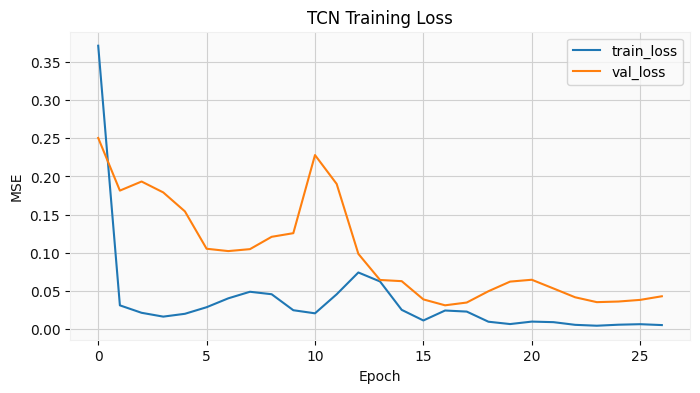

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history_tcn.history['loss'], label='train_loss')
plt.plot(history_tcn.history['val_loss'], label='val_loss')
plt.legend()
plt.title('TCN Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()


In [ ]:
# 1) 模型輸出（縮放空間）
y_pred_ret_scaled = tcn_model.predict(X_test)

# 2) 還原成 log return
y_pred_ret = scaler_y.inverse_transform(y_pred_ret_scaled)   # (N_test, 1)
y_true_ret = scaler_y.inverse_transform(y_test_scaled)       # 可選，看你要不要看 log return 表現

# 3) 用 base_test（t 日價格）反推隔日預測價格
#    pred_close = C_t * exp(pred_log_return)
true_close = y_price_test          # (N_test,1) 真實 C_{t+1}
base_close = base_test             # (N_test,1) 真實 C_t

pred_close = base_close * np.exp(y_pred_ret)

# 4) 計算 MAE / RMSE（在「價格空間」）
y_true_price = true_close

mae_tcn  = mean_absolute_error(y_true_price, pred_close)
rmse_tcn = math.sqrt(mean_squared_error(y_true_price, pred_close))

print("TCN Test MAE :", mae_tcn)
print("TCN Test RMSE:", rmse_tcn)



6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 344ms/step
TCN Test MAE : 4.381441988932189
TCN Test RMSE: 6.122346936725993


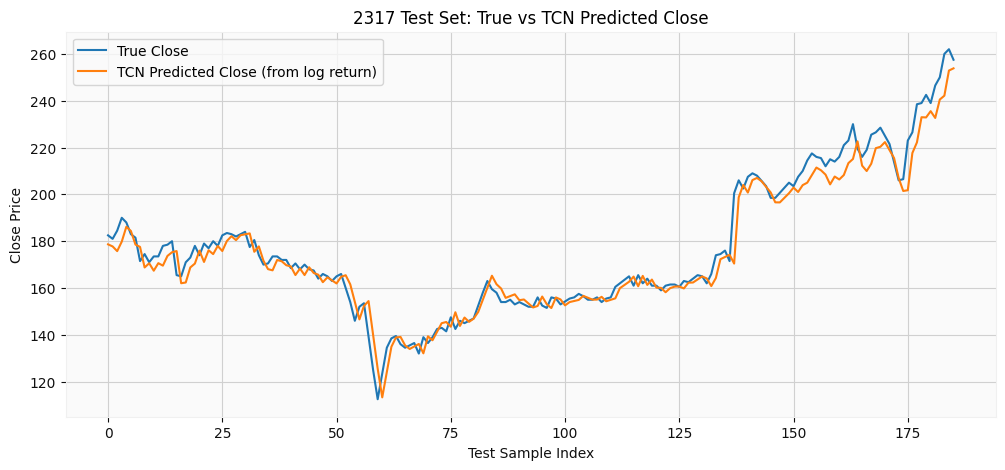

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(y_true_price, label='True Close')
plt.plot(pred_close,  label='TCN Predicted Close (from log return)')
plt.legend()
plt.title('2317 Test Set: True vs TCN Predicted Close')
plt.xlabel('Test Sample Index')
plt.ylabel('Close Price')
plt.show()



6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
TCN Test MAE : 4.381441988932189
TCN Test RMSE: 6.122346936725993


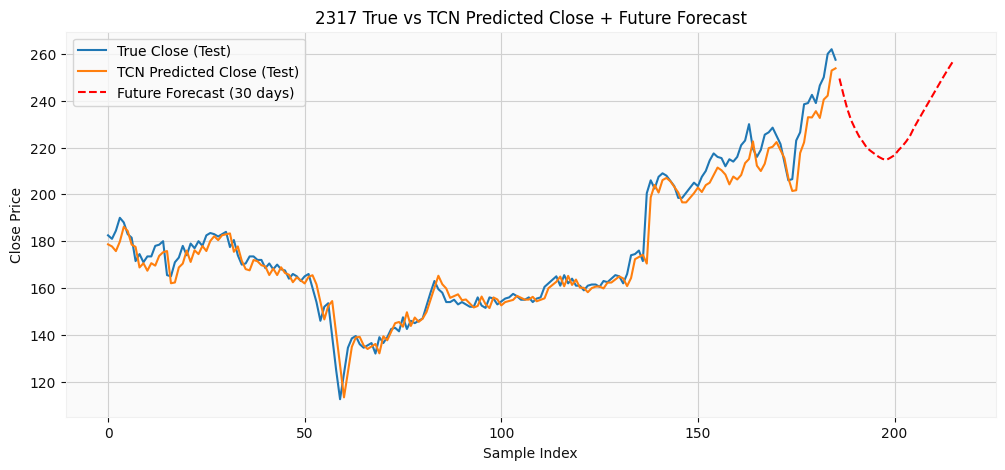

預期最低價：214.77
預計發生在未來第 13 天
預計發生在 2025-12-01


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

#====================#
# 1. 先在 Test 上評估
#====================#

# 模型輸出（log return，還在 scaled 空間）
y_pred_ret_scaled = tcn_model.predict(X_test)

# 還原成真正的 log return
y_pred_ret = scaler_y.inverse_transform(y_pred_ret_scaled)   # (N_test,1)
y_true_ret = scaler_y.inverse_transform(y_test_scaled)       # (N_test,1) 其實用不到也沒關係

# 用 base_test (C_t) 推回 C_{t+1}
# C_{t+1} = C_t * exp(log_return)
true_close = y_price_test            # 真實 C_{t+1}
base_close = base_test               # 真實 C_t
pred_close = base_close * np.exp(y_pred_ret)

y_true_price = true_close

mae_tcn  = mean_absolute_error(y_true_price, pred_close)
rmse_tcn = math.sqrt(mean_squared_error(y_true_price, pred_close))

print("TCN Test MAE :", mae_tcn)
print("TCN Test RMSE:", rmse_tcn)

#====================#
# 2. 往未來預測 N 天
#====================#

future_days = 30          # 想預測未來幾天可以自己改
time_window = X_test.shape[1]   # 20
feature_dim = X_test.shape[2]   # 11

# 以 test 最後一段序列當作未來預測的起點（已經是 scaled 的）
last_seq_scaled = X_test[-1:].copy()

# 未來預測從「目前最後一天的真實收盤價」開始往後滾
base_price_future = y_true_price[-1].item() # Use .item() to get the scalar value

predicted_future_prices = []

for _ in range(future_days):

    # (1) 用 TCN 預測下一天的 log return（scaled）
    y_future_ret_scaled = tcn_model.predict(last_seq_scaled, verbose=0)
    # 還原成真正的 log return
    y_future_ret = scaler_y.inverse_transform(y_future_ret_scaled)[0, 0]

    # (2) 根據 log return 推出下一天收盤價
    next_price = base_price_future * np.exp(y_future_ret)
    predicted_future_prices.append(next_price)

    # (3) 取得目前這 20 天的「未縮放特徵」
    last_seq_flat_scaled   = last_seq_scaled.reshape(1, -1)            # (1, 220)
    last_seq_flat_unscaled = scaler_X.inverse_transform(last_seq_flat_scaled)
    last_seq_unscaled      = last_seq_flat_unscaled.reshape(time_window, feature_dim)  # (20,11)

    # 取出最後一天的特徵，改掉 log_return / Close 作為新一天
    last_day = last_seq_unscaled[-1].copy()    # shape = (11,)
    last_day[0] = y_future_ret                 # log_return
    last_day[4] = next_price                   # Close 換成預測價

    # (4) 滑動視窗：丟掉最舊一天，補進新一天（都還是「未縮放特徵」）
    next_seq_unscaled = np.vstack([last_seq_unscaled[1:], last_day])

    # (5) 再把新的 20 天序列丟進 scaler_X 轉回 scaled，給下一輪模型用
    next_seq_flat_unscaled = next_seq_unscaled.reshape(1, -1)          # (1,220)
    next_seq_flat_scaled   = scaler_X.transform(next_seq_flat_unscaled)
    last_seq_scaled        = next_seq_flat_scaled.reshape(1, time_window, feature_dim)

    # 更新下一輪的 base_price
    base_price_future = next_price

predicted_future_prices = np.array(predicted_future_prices)

#====================#
# 3. 一起畫圖：Test + 未來
#====================#

plt.figure(figsize=(12,5))

# Test 真實價格
plt.plot(y_true_price, label='True Close (Test)')

# Test 預測價格
plt.plot(pred_close, label='TCN Predicted Close (Test)')

# 未來預測（用紅色虛線接在後面）
future_x = np.arange(len(y_true_price), len(y_true_price) + future_days)
plt.plot(future_x, predicted_future_prices,
         label=f'Future Forecast ({future_days} days)', linestyle='--', color='red')

plt.title('2317 True vs TCN Predicted Close + Future Forecast')
plt.xlabel('Sample Index')
plt.ylabel('Close Price')
plt.legend()

plt.show()

# 找出最低點與時間
min_price = np.min(predicted_future_prices)
min_day_index = np.argmin(predicted_future_prices) + 1
print(f"預期最低價：{min_price:.2f}")
print(f"預計發生在未來第 {min_day_index} 天")
last_date = df.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=future_days+1, inclusive='right') # Changed 'closed' to 'inclusive'
min_price_date = forecast_dates[min_day_index - 1]
print(f"預計發生在 {min_price_date.date()}")



---



In [ ]:
#NO9
##最後一步
import twstock.realtime

# 設定 twstock.realtime.mock 為 False，確保使用即時的股票數據，而不是模擬數據
twstock.realtime.mock = False

# 使用 twstock.realtime.get 查詢指定股票即時資料
# 查詢股票代號 2633 的即時交易資料
real_data = twstock.realtime.get('2317')

# 將取得的即時資料轉換為 Pandas DataFrame 格式，方便進行資料操作和視覺化
real_data_df = pd.DataFrame(real_data)

# 顯示轉換後的 DataFrame，方便檢視即時股票資料
display(real_data_df)


,timestamp,info,realtime,success
code,1.763447e+09,2317,NaN,True
channel,1.763447e+09,2317.tw,NaN,True
name,1.763447e+09,鴻海,NaN,True
fullname,1.763447e+09,鴻海精密工業股份有限公司,NaN,True
time,1.763447e+09,2025-11-18 06:30:00,NaN,True
latest_trade_price,1.763447e+09,NaN,230.0000,True
trade_volume,1.763447e+09,NaN,5300,True
accumulate_trade_volume,1.763447e+09,NaN,74378,True
best_bid_price,1.763447e+09,NaN,"[230.0000, 229.5000, 229.0000, 228.5000, 228.0...",True
best_bid_volume,1.763447e+09,NaN,"[6637, 1295, 1825, 1263, 2097]",True
